In [1]:
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import nibabel as nib
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.plotting import plot_design_matrix
import os
import pandas as pd

import sys
sys.path.append('/Users/zeynepenkavi/Documents/RangelLab/DescribedVsLearned_fmri/analysis/01_level1')
from level1_utils import get_confounds

/Users/zeynepenkavi/.pyenv/versions/3.8.3/envs/py-dvl-fmri/lib/python3.8/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [26]:
data_path = '/Users/zeynepenkavi/Downloads/GTavares_2017_arbitration/bids_nifti_wface/'
subnum = '01'
runnum = '1'

In [3]:
fn = os.path.join(data_path, 'sub-%s/func/sub-%s_task-bundles_run-%s_bold.json'%(subnum, subnum, runnum))
f = open(fn)
bold_sidecar = json.load(f)
f.close()

In [4]:
tr = float(bold_sidecar['RepetitionTime']) 
n_scans = max(bold_sidecar['time']['samples']['AcquisitionNumber'])
frame_times = np.arange(n_scans) * tr 

In [5]:
fn = os.path.join(data_path, 'sub-%s/func/sub-%s_task-bundles_run-%s_events.tsv' %(subnum, subnum, runnum))
events = pd.read_csv(fn, sep='\t')

In [6]:
fn = os.path.join(data_path, 'derivatives/sub-%s/func/sub-%s_task-bundles_run-%s_desc-confounds_timeseries.tsv'%(subnum, subnum, runnum))
confounds = pd.read_csv(fn,  sep='\t')

In [7]:
design_matrix = make_first_level_design_matrix(frame_times, 
                                               events[['onset', 'duration', 'trial_type']], 
                                               drift_model='cosine', 
                                               add_regs= get_confounds(confounds), 
                                               hrf_model='spm + derivative')

<AxesSubplot:label='conditions', ylabel='scan number'>

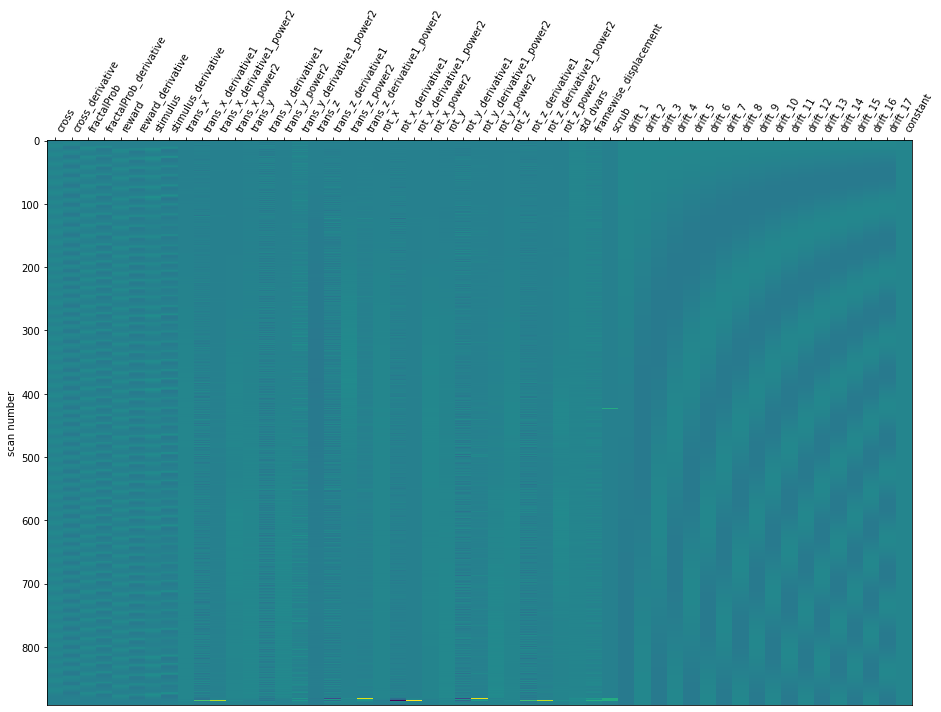

In [9]:
plot_design_matrix(design_matrix)

In [44]:
type(design_matrix)

pandas.core.frame.DataFrame

In [45]:
events

,onset,duration,trial_type,response_time,identifier
0,0.097594,6.019510,cross,1.426900,"images/16.jpg, images/5.jpg"
1,6.117104,2.051039,fractalProb,1.426900,"images/16.jpg, images/5.jpg"
2,8.168143,1.426900,stimulus,1.426900,"images/16.jpg, images/5.jpg"
3,9.685461,3.018033,reward,1.426900,"images/16.jpg, images/5.jpg"
4,12.703494,7.603659,cross,1.721190,"images/16.jpg, images/5.jpg"
...,...,...,...,...,...
235,854.769417,3.018079,reward,0.704494,"images/16.jpg, images/5.jpg"
236,857.787496,9.321098,cross,1.788778,"images/16.jpg, images/5.jpg"
237,867.108594,2.017483,fractalProb,1.788778,"images/16.jpg, images/5.jpg"
238,869.126076,1.788778,stimulus,1.788778,"images/16.jpg, images/5.jpg"
